In [15]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting_and_analysis import plot_utils, summary_plots, spatial_fits, analysis_utils
plot_utils.set_plotting_defaults()

In [16]:
# Load results of the fitting procedure

subject = 1
volume_space=True
fitting_type = 'texture_pyramid_ridge_4ori_4sf'
# fitting_type = 'texture_pyramid_pcaHL_ridge_4ori_4sf'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = analysis_utils.load_fit_results(subject, volume_space, fitting_type, n_from_end=0, root=root, verbose=True);
analysis_utils.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf/Sep-22-2021_1647_40/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'pc', 'min_pct_var', 'max_pc_to_retain', 'feature_info', 'group_all_hl_feats'])
subject = 1
volume_space = 1
fitting_type = pyramid_texture
voxel_mask: shape (699192,)
brain_nii_shape: shape (3,)
image_order: shape (7500,)
voxel_index: len 1
voxel_roi: len 2
voxel_ncsnr: shape (699192,)
aperture = 1.0
aperture_rf_range = 1.1
models: shape (875, 3)
n_prf_sd_out = 2
best_losses: shape (14913, 3)
best_lambdas: shape (14913, 3)
best_params: len 6
lambdas: shape (9,)
val_cc: shape (1491

In [35]:
out['shuff_rnd_seed']

501622

In [22]:
np.argmin(out['val_r2'][:,0])

943

In [23]:
vind = 943

In [24]:
out['val_r2'][vind,0]

-2.739661e+16

In [32]:
x,y,sigma = out['best_params'][0][vind,0,:]
x,y,sigma

(0.2026315789473685, 0.4342105263157895, 0.03999999910593033)

In [31]:
mind = out['best_params'][5][vind,0]
mind

353

In [36]:
out['best_params'][1][vind,0:10,0]

array([-0.01358995, -0.00102019,  0.03897677,  0.04457061, -0.02278942,
        0.01617156, -0.0212505 ,  0.01503736, -0.01999819, -0.0360194 ],
      dtype=float32)

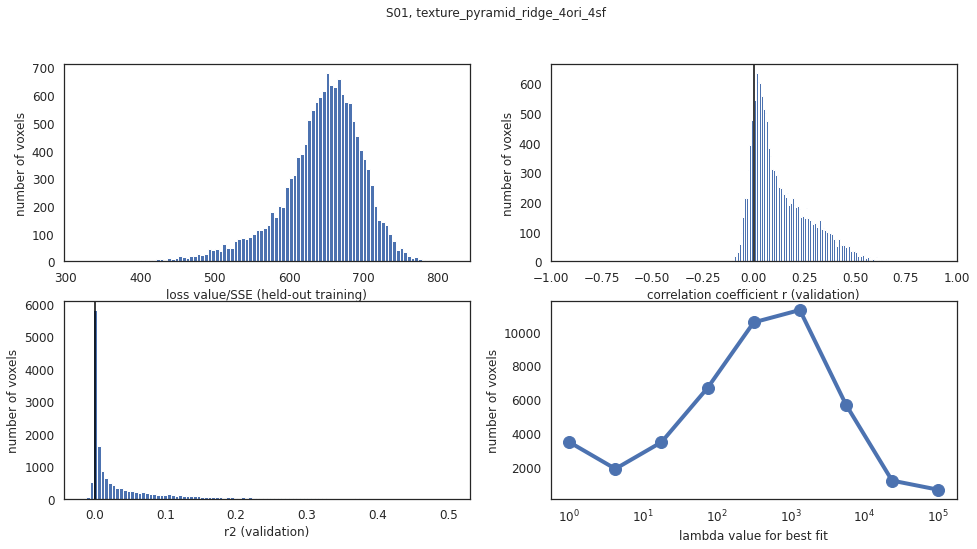

In [6]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_perf_summary(subject, fitting_type, out, fig_save_folder=fig_save_folder)

In [6]:
# plot_utils.plot_fit_summary_volume_space(subject, fitting_type,out, fig_save_folder)

In [7]:
summary_plots.plot_summary_pycortex(subject, fitting_type, out, port=33333)

Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


In [8]:

retlabs, catlabs, ret_group_names, categ_group_names = get_combined_rois(subject, out)

NameError: name 'roi_utils' is not defined

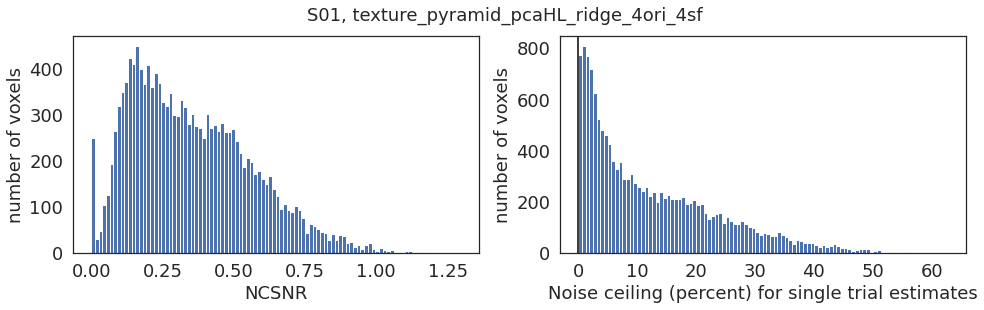

In [25]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_noise_ceilings(subject, fitting_type,out, fig_save_folder)

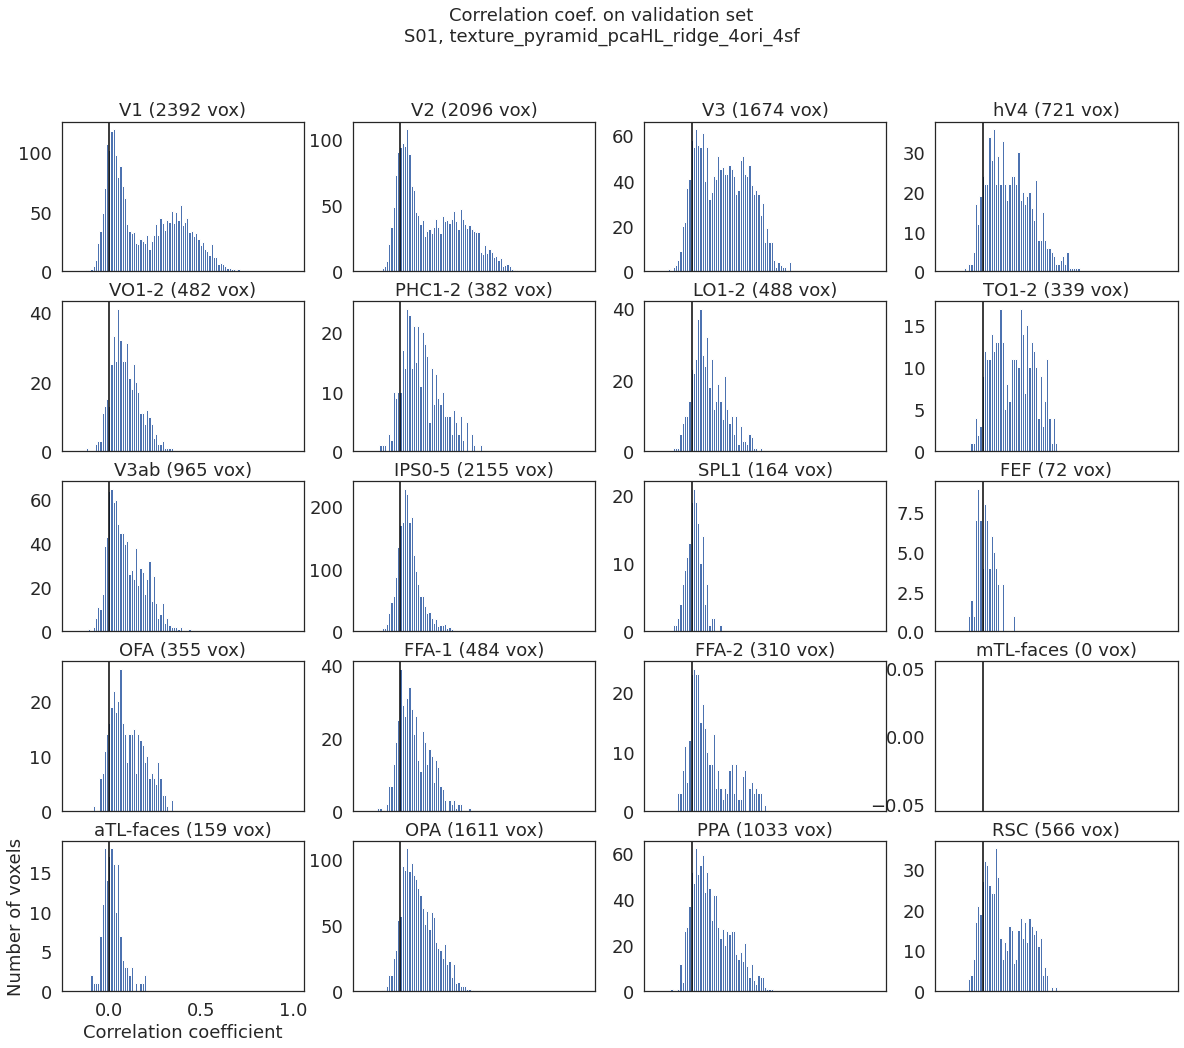

In [26]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_cc_each_roi(subject, fitting_type,out, fig_save_folder)

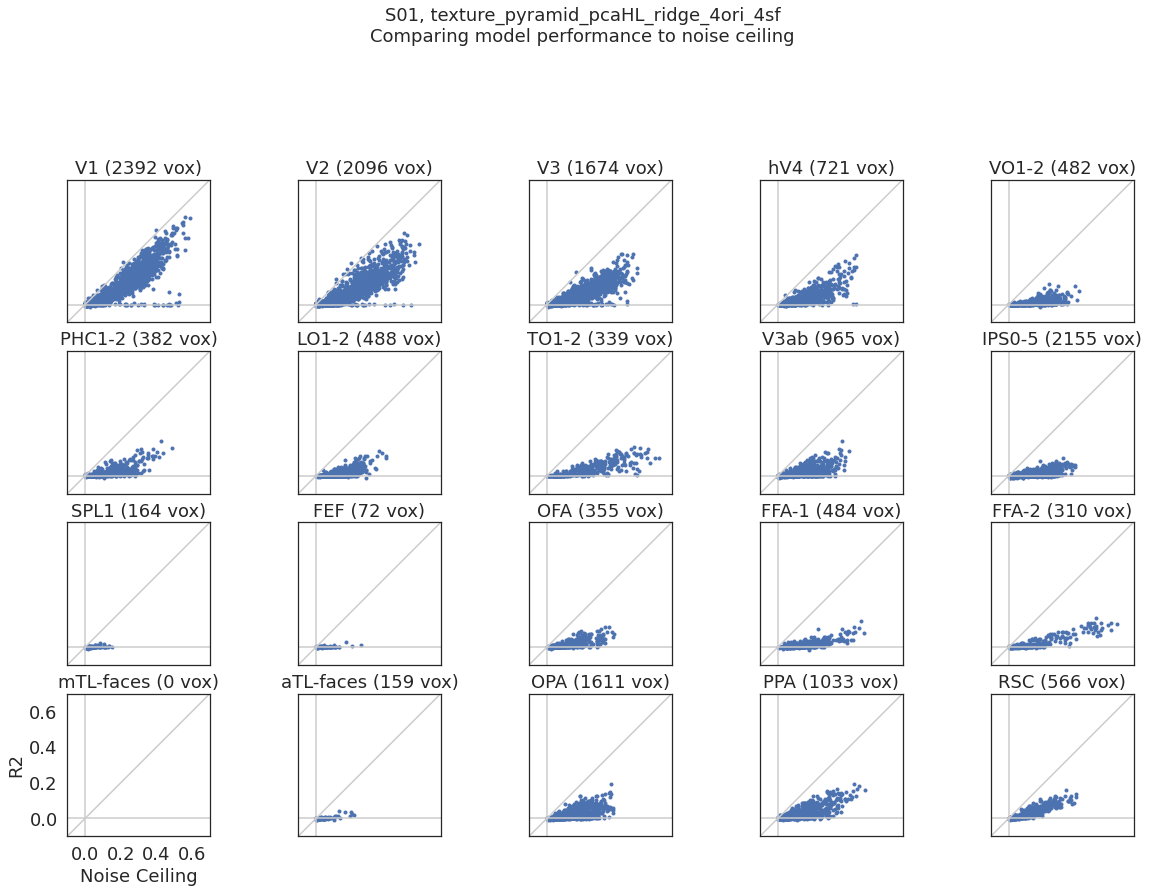

In [27]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_r2_vs_nc(subject, fitting_type,out, fig_save_folder, fig_size=(20,24))

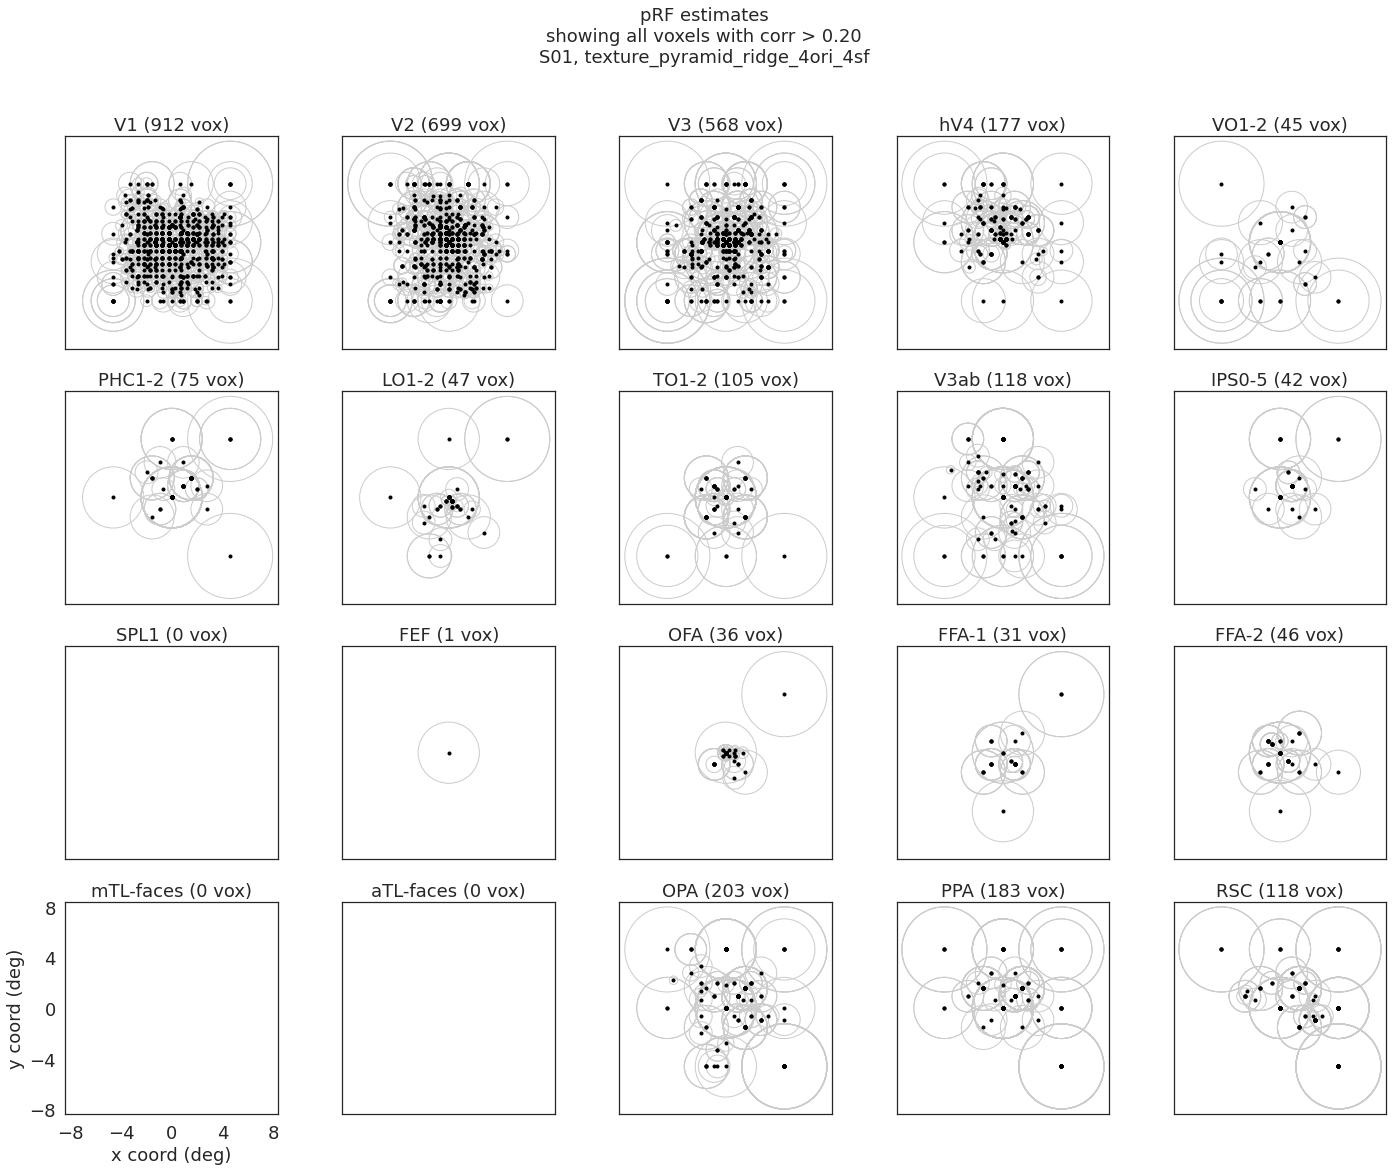

In [8]:
plot_utils.set_all_font_sizes(fs = 18)
spatial_fits.plot_spatial_rf_circles(subject, fitting_type,out, cc_cutoff = 0.20, fig_save_folder=fig_save_folder)

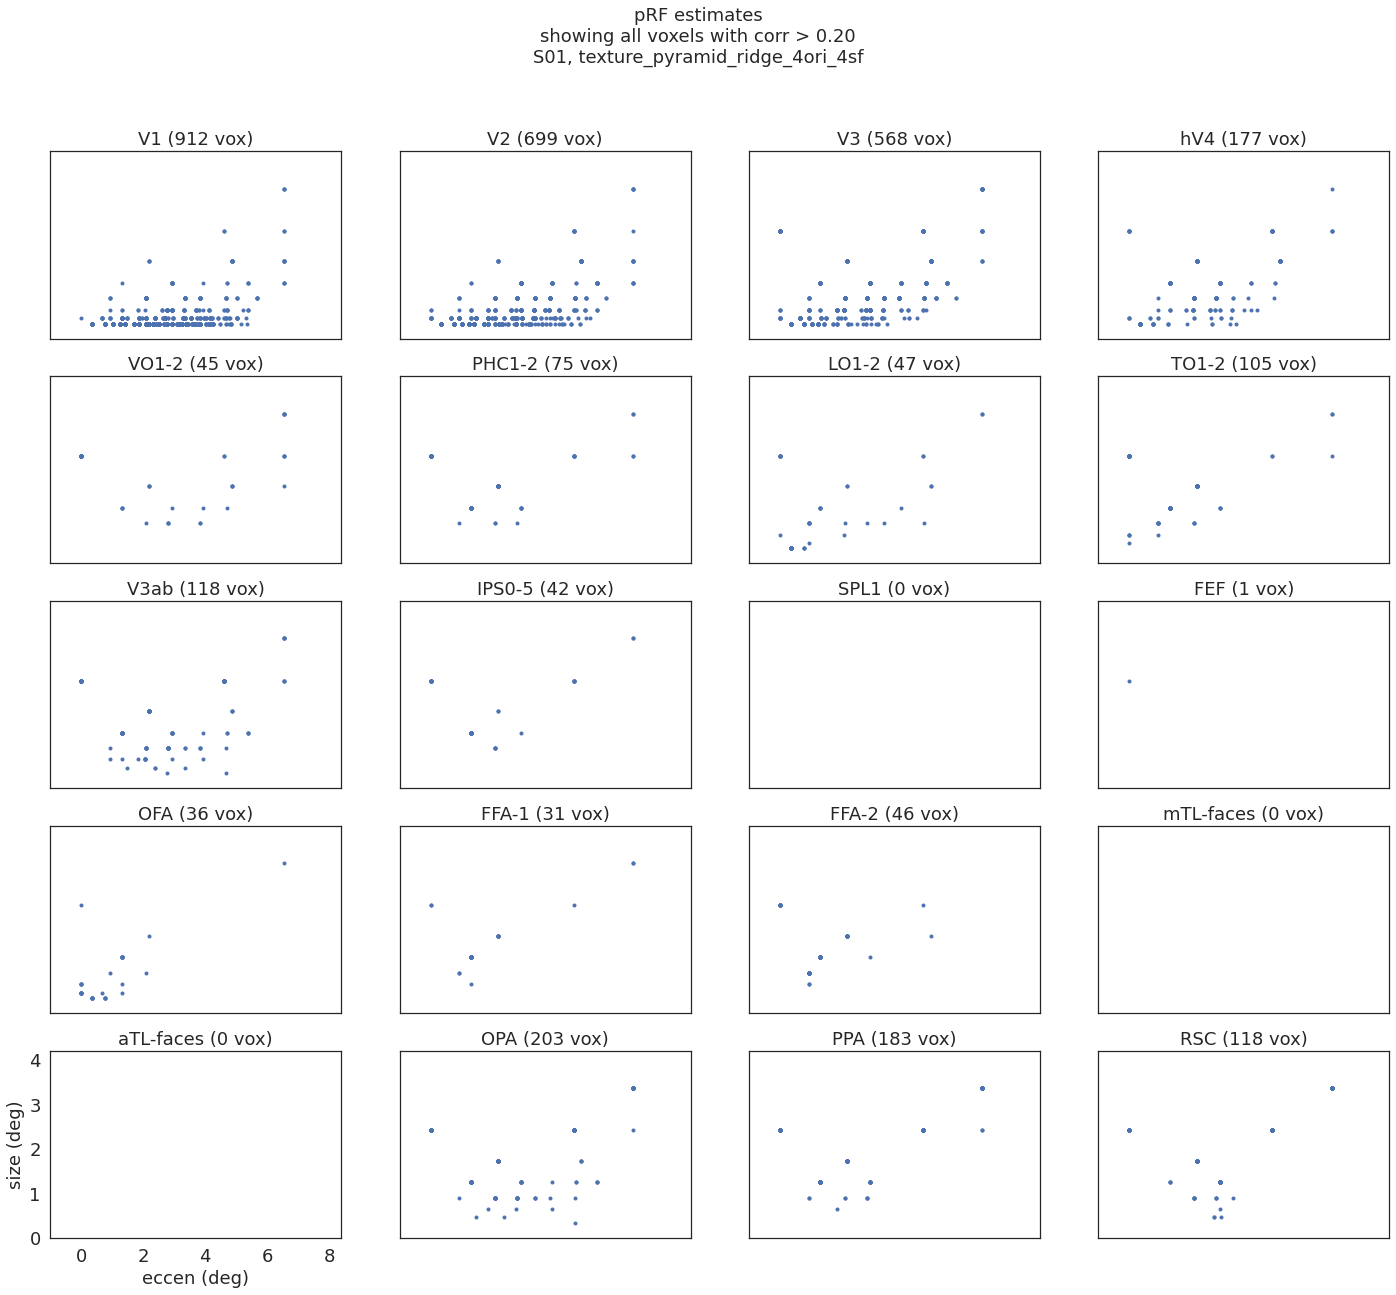

In [9]:
plot_utils.set_all_font_sizes(fs = 18)
spatial_fits.plot_size_vs_eccen(subject, fitting_type, out, cc_cutoff=0.20, fig_save_folder=fig_save_folder)

Text(0.5, 1.0, 'PCs needed to capture 95 pct var')

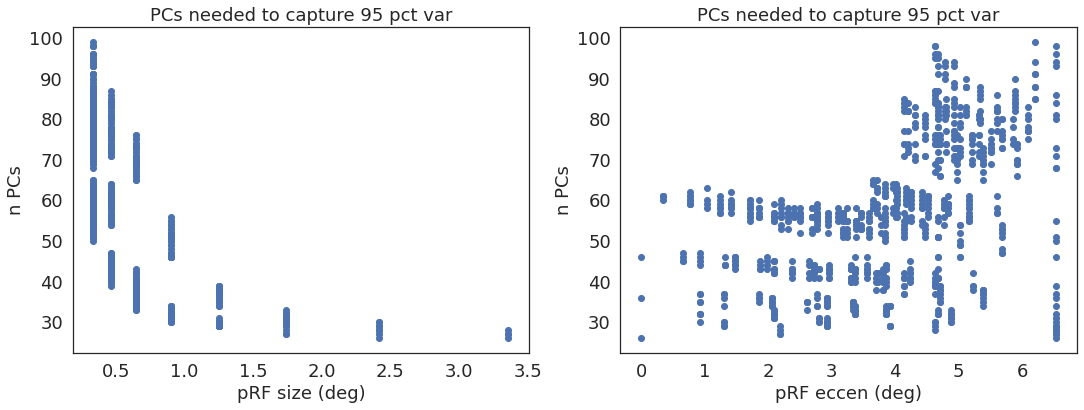

In [36]:
n_comp_needed = out['pc'][2]
min_pct_var = out['pc'][1]
models_deg = out['models']*8.4
ecc_deg  = np.sqrt(np.square(models_deg[:,0]) + np.square(models_deg[:,1]))

models_deg

plt.figure(figsize=(18,6));
plt.subplot(1,2,1)
plt.scatter(models_deg[:,2], n_comp_needed);
plt.xlabel('pRF size (deg)')
plt.ylabel('n PCs')
plt.title('PCs needed to capture %d pct var'%min_pct_var)
plt.subplot(1,2,2)
plt.scatter(ecc_deg, n_comp_needed);
plt.xlabel('pRF eccen (deg)')
plt.ylabel('n PCs')
plt.title('PCs needed to capture %d pct var'%min_pct_var)

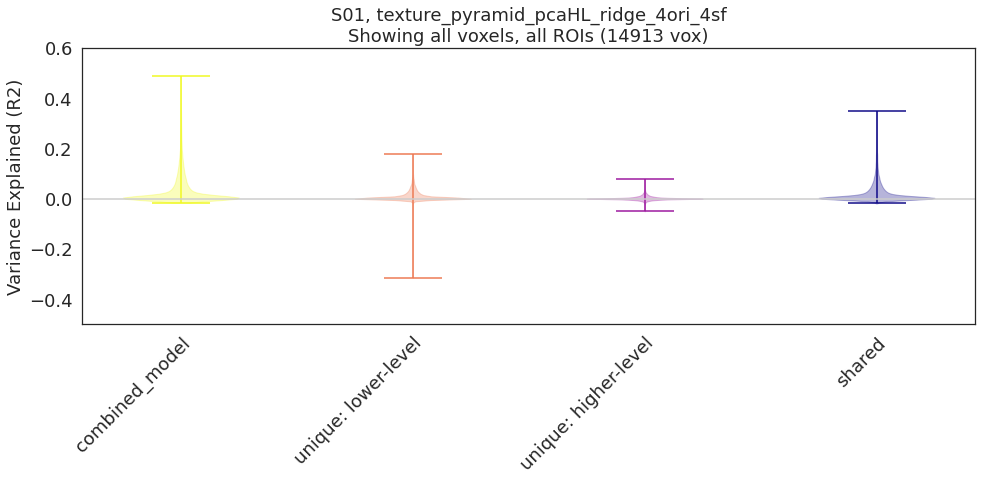

In [32]:
pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
val_r2 = analysis_utils.get_r2(out)
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.50, 0.60])
vp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_allrois.png'))

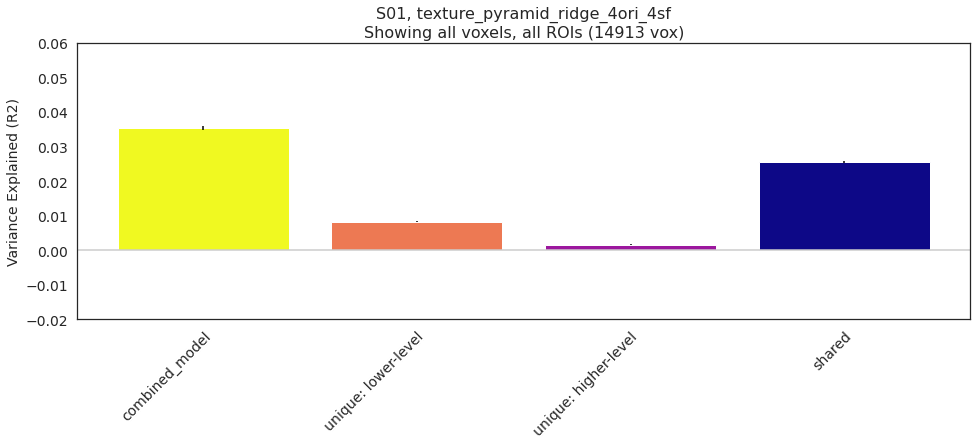

In [14]:
pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
val_r2 = analysis_utils.get_r2(out)
# val_r2 = out['val_r2']
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.02, 0.06])
bp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_allrois.png'))

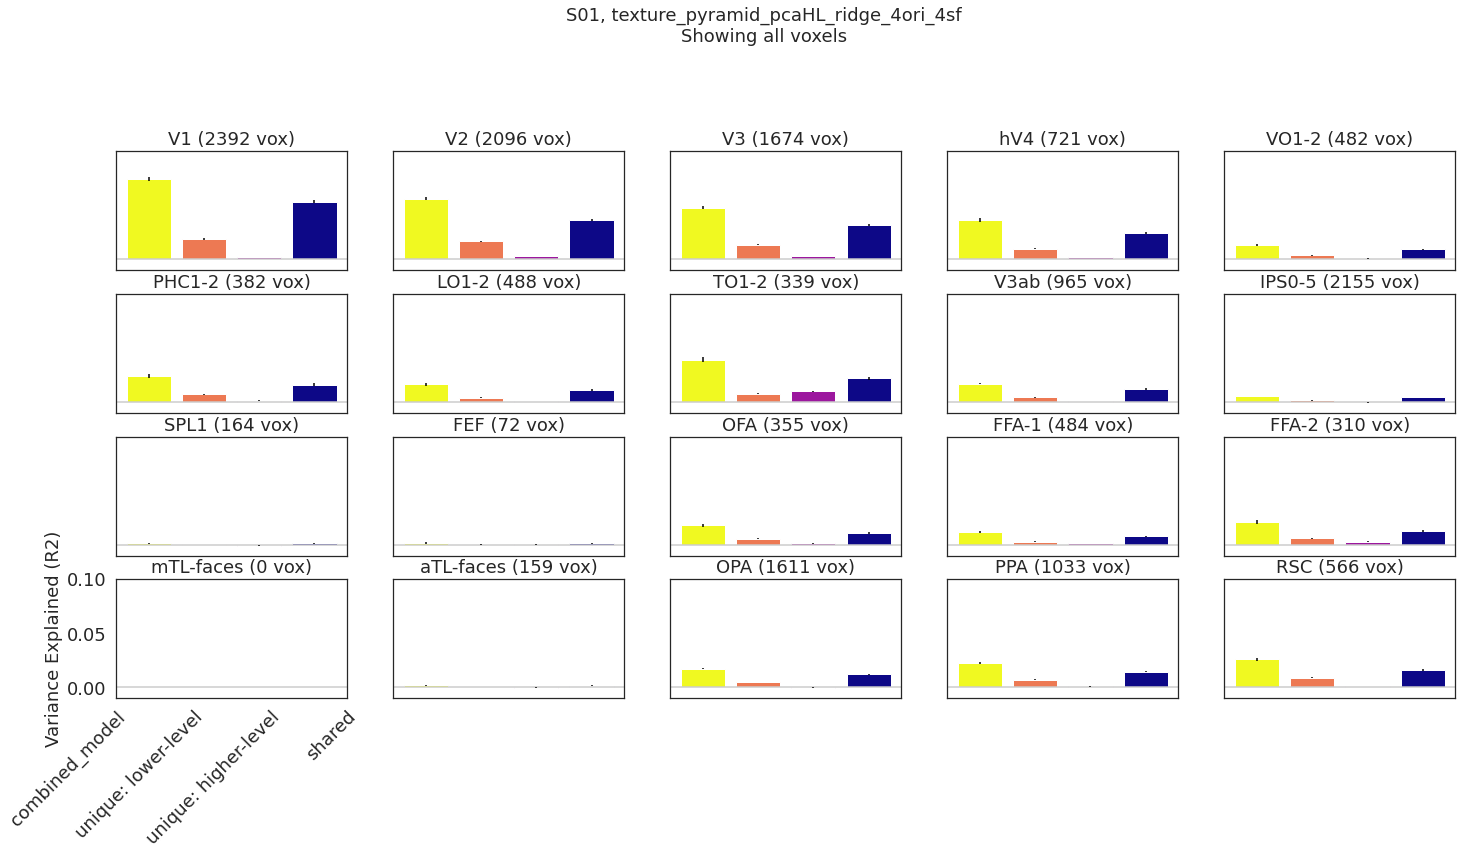

In [33]:
pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
val_r2 = analysis_utils.get_r2(out)
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.01, 0.10])
plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_eachroi.png'))

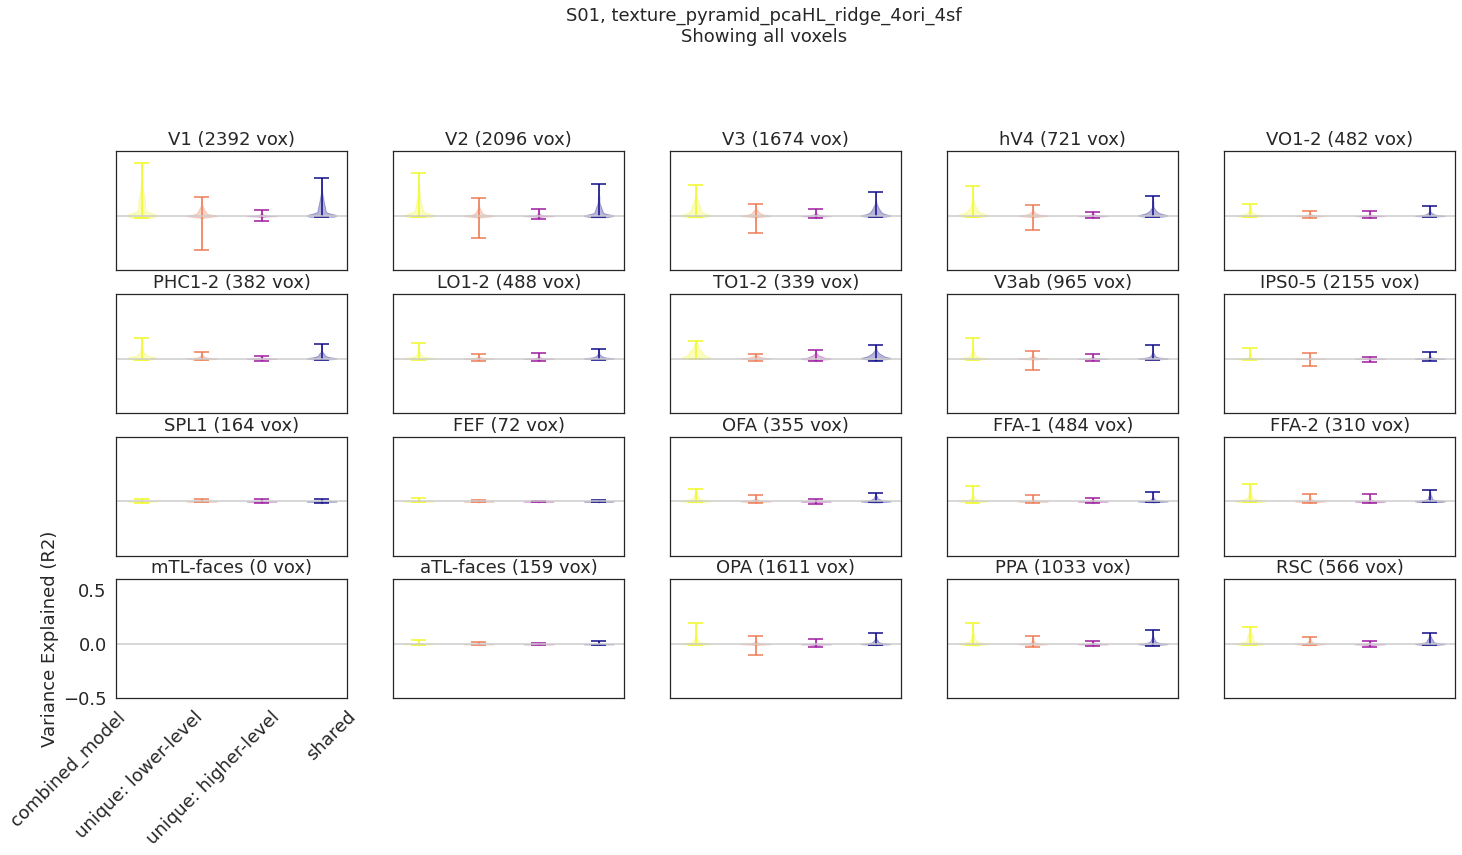

In [35]:
pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
val_r2 = analysis_utils.get_r2(out)
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

inds2use = np.ones(np.shape(val_r2[:,0]))==1

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                                                        horizontal_line_pos=0, ylims=[-0.50, 0.60])
plot_utils.create_roi_subplots(var_expl, inds2use, vp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels'%(subject, fitting_type))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_violin_eachroi.png'))

In [34]:
# Make plots in pycortex for variance partitioning analysis

import cortex

port=33333

pp0 = 0
pp1 = 1
pp2 = 2

name1 = out['partial_version_names'][pp1][5:]
name2 = out['partial_version_names'][pp2][5:]
val_r2 = analysis_utils.get_r2(out)
ve_names = ['combined_model', 'unique: ' + name1, 'unique: ' + name2, 'shared']
shared_ab, unique_a, unique_b = analysis_utils.get_shared_unique_var(val_r2[:,pp0], val_r2[:,pp1], val_r2[:,pp2])

var_expl = np.concatenate((val_r2[:,pp0:pp0+1], unique_a[:,np.newaxis], unique_b[:,np.newaxis],shared_ab[:,np.newaxis]),axis=1)

max_ind = np.argmax(var_expl[:,1:3], axis=1)

maps = [max_ind+1] + [var_expl[:,fi] for fi in range(var_expl.shape[1])]

names = ['Prefered feature type (based on unique var)'] + ve_names

cmaps = ['plasma_r', 'PuBu', 'PuBu', 'PuBu', 'PuBu']
mins = [0,0,0,0,0]
maxes = [2, 0.4, 0.10, 0.10, 0.2]

plot_utils.plot_maps_pycortex(maps, names, subject, out, fitting_type, port, cmaps=cmaps, mins=mins, maxes=maxes)

Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


KeyboardInterrupt: 

In [28]:
# Make plots in pycortex for variance partitioning analysis

import cortex

port=33333
# var_expl, ve_names = analysis_utils.process_two_way_var_part(out)
# max_ind = np.argmax(var_expl[:,1:3], axis=1)

# maps = [max_ind+1] + [var_expl[:,fi] for fi in range(var_expl.shape[1])]

# names = ['Prefered feature type (based on unique var)'] + ve_names
names = ['Full Model'] + ['Unique_' + ff for ff in out['feature_info'][1]]
maps = [out['val_cc'][:,0]] + [out['val_cc'][:,ff] - out['val_cc'][:,0] for ff in np.arange(1,out['val_cc'].shape[1])]
cmaps = ['PuBu']
mins = [0]
maxes = [0.2]

plot_utils.plot_maps_pycortex(maps, names, subject, out, fitting_type, port, cmaps=cmaps, mins=mins, maxes=maxes)

Data is in 3d volume space


IndexError: list index out of range

In [30]:
out['partial_version_names']

['full_model', 'just_lower-level', 'just_higher-level']

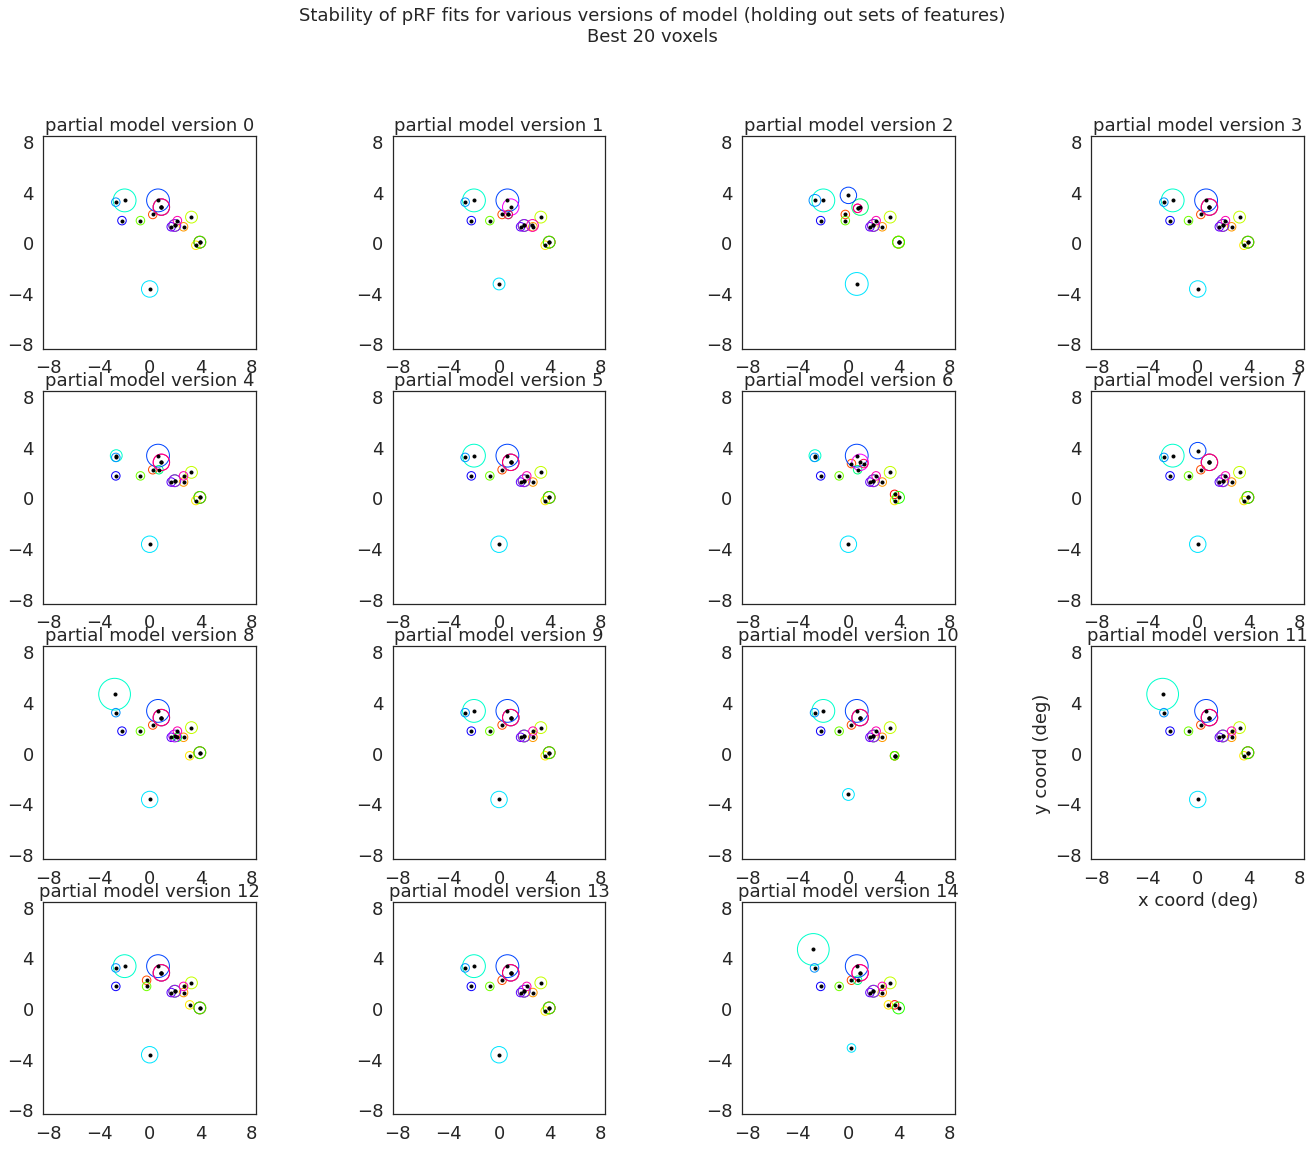

In [12]:
spatial_fits.plot_prf_stability_partial_versions(subject, out, cc_cutoff = 0.2, screen_eccen_deg = 8.4, fig_save_folder=fig_save_folder)


['pixel_stats', 'mean_magnitudes', 'mean_realparts', 'marginal_stats_lowpass_recons', 'variance_highpass_resid', 'magnitude_feature_autocorrs', 'lowpass_recon_autocorrs', 'highpass_resid_autocorrs', 'magnitude_within_scale_crosscorrs', 'real_within_scale_crosscorrs', 'magnitude_across_scale_crosscorrs', 'real_imag_across_scale_crosscorrs', 'real_spatshift_within_scale_crosscorrs', 'real_spatshift_across_scale_crosscorrs']


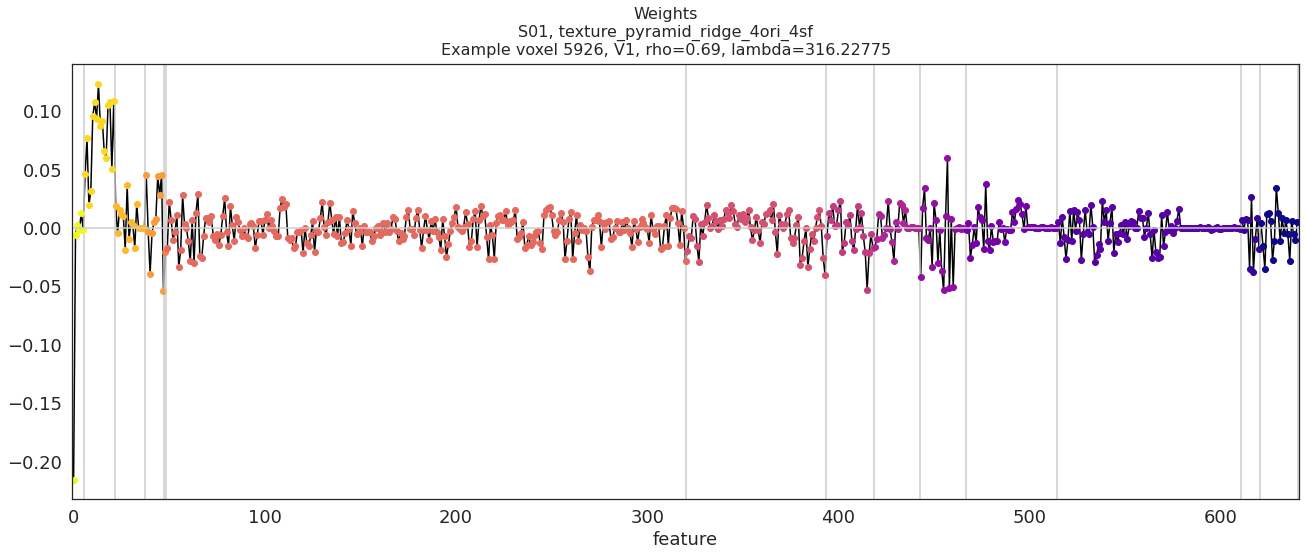

In [15]:
from plotting_and_analysis import texture_models
texture_models.plot_example_weights_texture(subject, fitting_type, out, fig_save_folder)

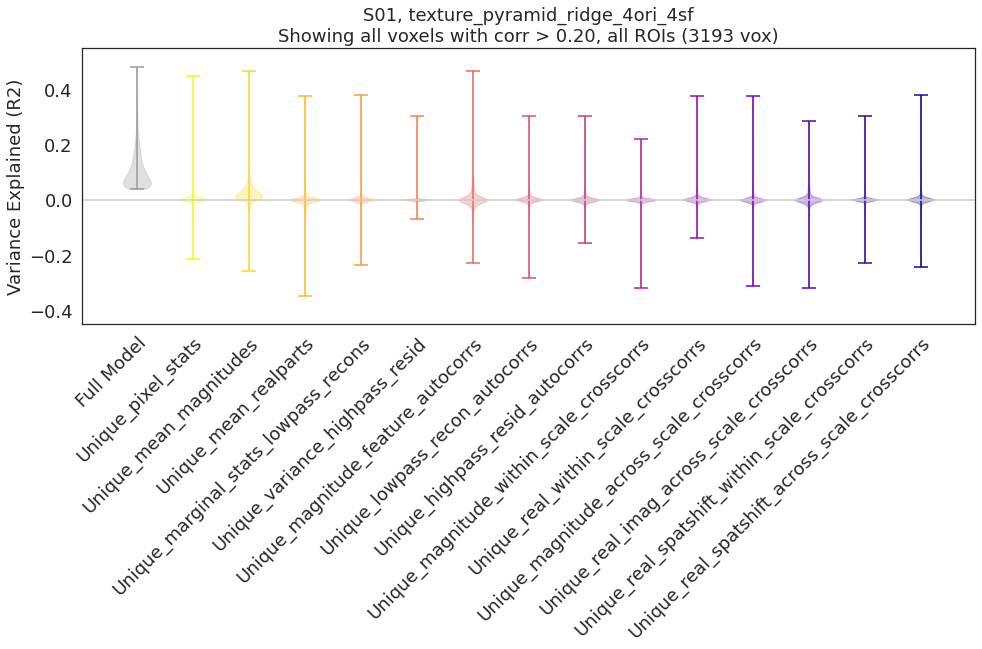

In [41]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_r2 = analysis_utils.get_r2(out)

# Compute variance explained by each feature type - how well does the model without that feature type
# do, compared to the model with all features? 
# (subtract later columns from the first column)
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,val_r2.shape[1]-1]) - val_r2[:,1:] 
var_expl = np.concatenate([val_r2[:,0:1], var_expl], axis=1)
ve_names = ['Full Model'] + ['Unique_' + ff for ff in out['feature_info'][1]]

colors = cm.plasma(np.linspace(0,1,len(ve_names)-1))
graycolor = np.array([0.6, 0.6, 0.6, 1])
colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)

inds2use = out['val_cc'][:,0]>cc_cutoff

vp = plot_utils.violin_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels with corr > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.45, 0.55])
vp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'violin_uniq_var_texturefeat_allrois.png'))
    plt.savefig(os.path.join(fig_save_folder,'violin_uniq_var_texturefeat_allrois.pdf'))


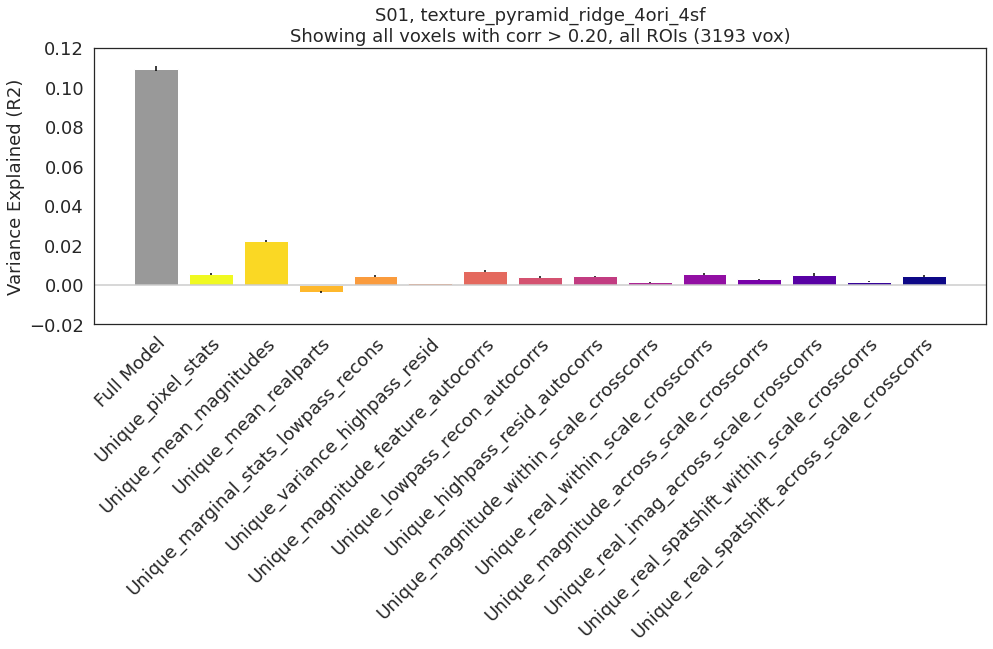

In [42]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_r2 = analysis_utils.get_r2(out)

# Compute variance explained by each feature type - how well does the model without that feature type
# do, compared to the model with all features? 
# (subtract later columns from the first column)
var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,val_r2.shape[1]-1]) - val_r2[:,1:] 
var_expl = np.concatenate([val_r2[:,0:1], var_expl], axis=1)
ve_names = ['Full Model'] + ['Unique_' + ff for ff in out['feature_info'][1]]

colors = cm.plasma(np.linspace(0,1,len(ve_names)-1))
graycolor = np.array([0.6, 0.6, 0.6, 1])
colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)

inds2use = out['val_cc'][:,0]>cc_cutoff

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', \
                 title='S%02d, %s\nShowing all voxels with corr > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=[-0.02, 0.12])
bp.create(data=var_expl[inds2use,:], new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'bars_uniq_var_texturefeat_allrois.png'))
    plt.savefig(os.path.join(fig_save_folder,'bars_uniq_var_texturefeat_allrois.pdf'))


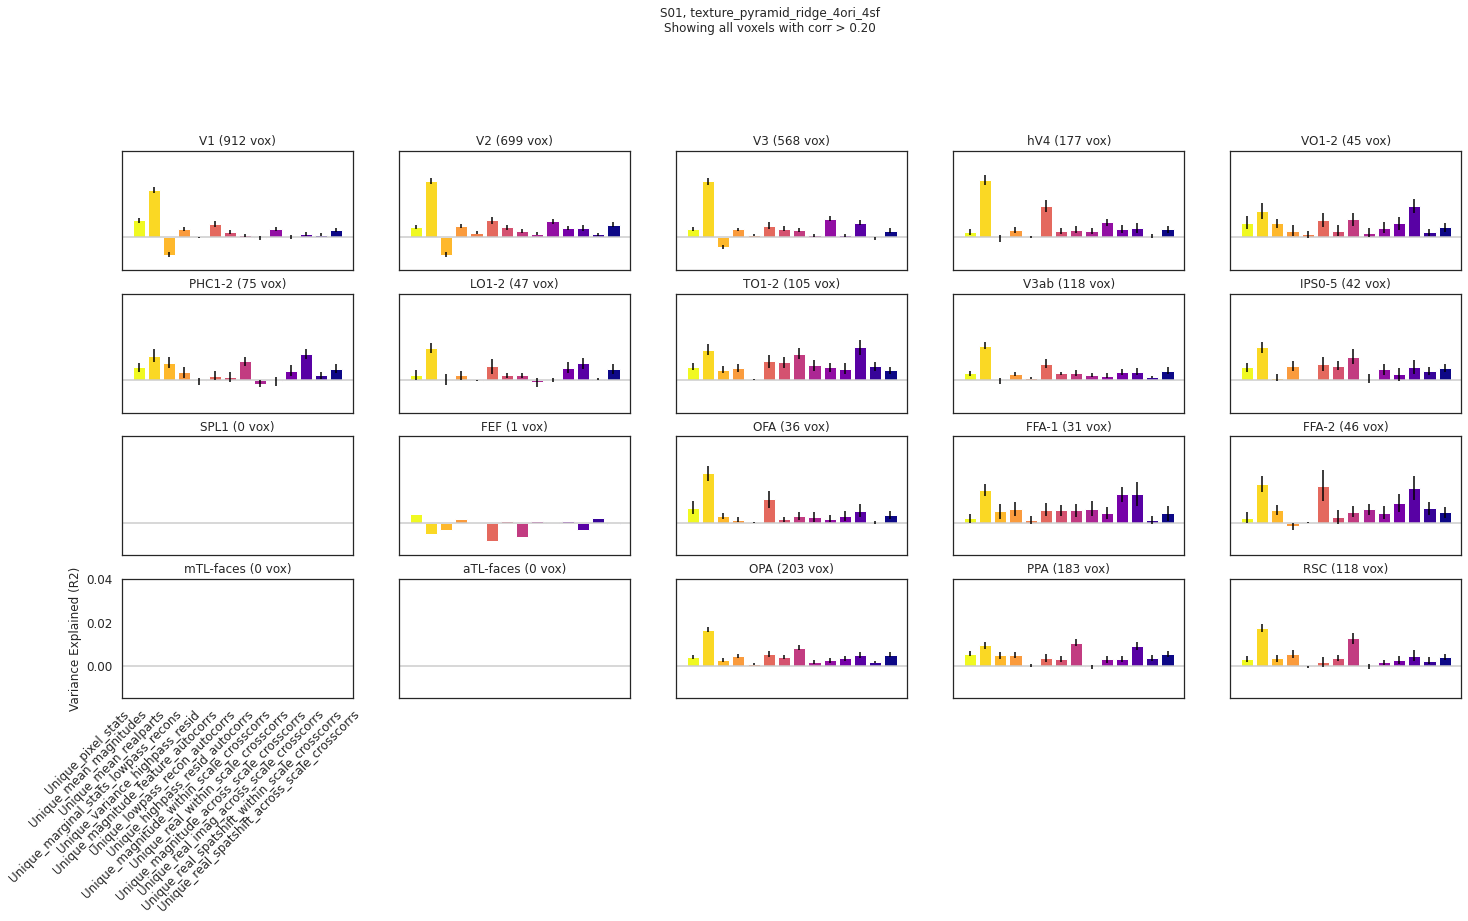

In [45]:
plot_utils.set_all_font_sizes(fs = 12)
cc_cutoff = 0.20
val_r2 = analysis_utils.get_r2(out)

var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,val_r2.shape[1]-1]) - val_r2[:,1:] 
# var_expl = np.concatenate([val_r2[:,0:1], var_expl], axis=1)
# ve_names = ['Full Model'] + ['Unique_' + ff for ff in out['feature_info'][1]]
ve_names = ['Unique_' + ff for ff in out['feature_info'][1]]

colors = cm.plasma(np.linspace(0,1,len(ve_names)))
# graycolor = np.array([0.6, 0.6, 0.6, 1])
# colors = np.concatenate((graycolor[np.newaxis,:], np.flipud(colors)), axis=0)
colors = np.flipud(colors)

inds2use = out['val_cc'][:,0]>cc_cutoff

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Variance Explained (R2)', plot_errorbars=True, \
                  horizontal_line_pos=0, ylims=[-0.015, 0.04])

plot_utils.create_roi_subplots(var_expl, inds2use, bp, subject, out, \
                    suptitle='S%02d, %s\nShowing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff))

plt.gcf().subplots_adjust(bottom=0.5)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_texturefeat_eachroi.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'uniq_var_bars_texturefeat_eachroi.png'))

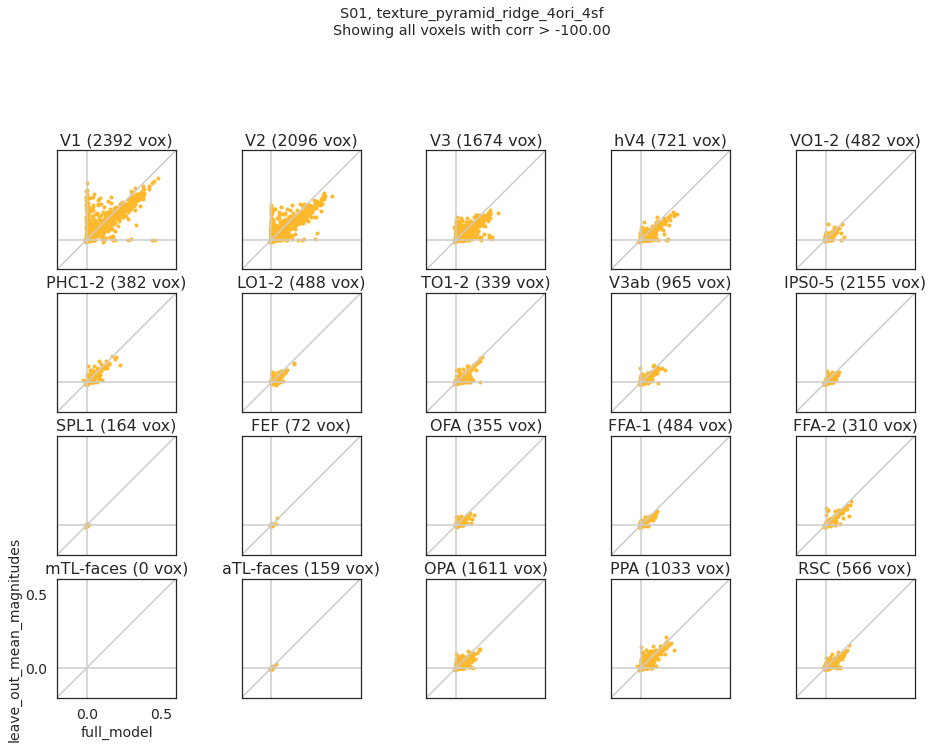

In [5]:
pp1=0
pp2=2

cc_cutoff = -100
val_r2 = analysis_utils.get_r2(out)

if len(out['best_params'])>6:
    partial_version_names = out['best_params'][6]
else:
    partial_version_names = out['partial_version_names']
        
colors = cm.plasma(np.linspace(0,1,len(out['feature_info'][1])))
colors = np.flipud(colors)
color = colors[pp2]

inds2use = out['val_cc'][:,0]>cc_cutoff

sp = plot_utils.scatter_plot(color=color, xlabel=partial_version_names[pp1], ylabel=partial_version_names[pp2], xlims=[-0.2, 0.6], ylims=[-0.2, 0.6], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                 title='S%02d, %s\nShowing all voxels with corr > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)), \
                                                        show_diagonal=True, show_axes=True);
plot_utils.create_roi_subplots(val_r2[:,[pp1, pp2]], inds2use, sp, subject, out,\
                                      suptitle='S%02d, %s\nShowing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff),\
                                      label_just_corner=True, figsize=(16,20))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'compare_%s_vs_%s_scatter_eachroi.pdf'%(partial_version_names[pp1], partial_version_names[pp2])))
    plt.savefig(os.path.join(fig_save_folder,'compare_%s_vs_%s_scatter_eachroi.png'%(partial_version_names[pp1], partial_version_names[pp2])))

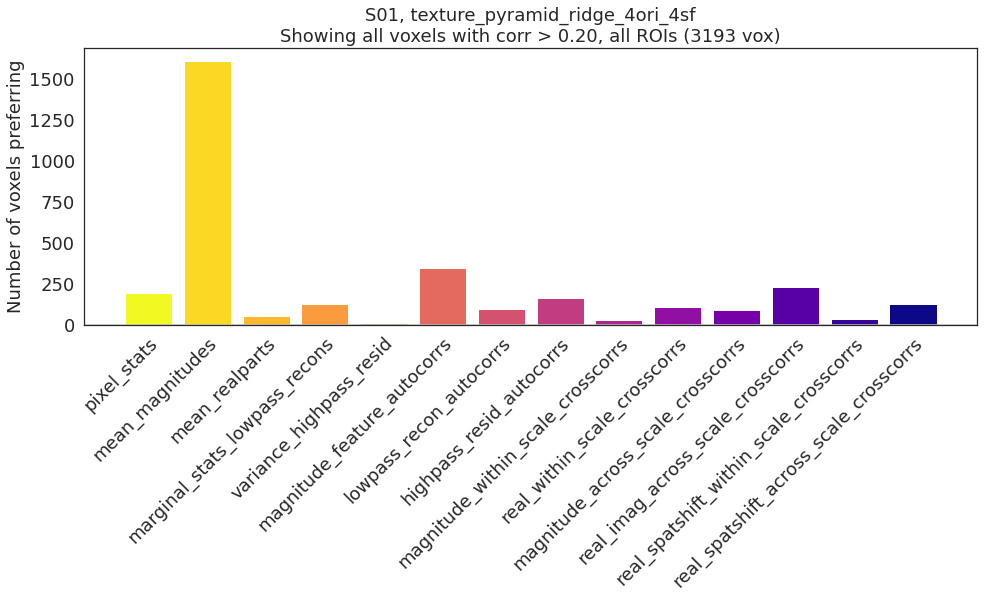

In [17]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20

# Compute variance explained by each feature type - how well does the model without that feature type
# do, compared to the model with all features? 
# (subtract later columns from the first column)
n_feature_types = len(out['feature_info'][1])
val_r2 = analysis_utils.get_r2(out)

var_expl = np.tile(np.expand_dims(val_r2[:,0], axis=1), [1,n_feature_types]) - val_r2[:,1:] 
max_ve  = np.argmax(var_expl, axis=1)

inds2use = out['val_cc'][:,0]>cc_cutoff

unvals = np.arange(0,n_feature_types)
counts = np.array([np.sum(np.logical_and(max_ve==ff, inds2use)) for ff in unvals])
counts = counts[np.newaxis,:]

ve_names = out['feature_info'][1]
colors = cm.plasma(np.linspace(0,1,len(ve_names)))
colors = np.flipud(colors)

bp = plot_utils.bar_plot(colors=colors, column_labels=ve_names, ylabel='Number of voxels preferring', \
                 title='S%02d, %s\nShowing all voxels with corr > %.2f, all ROIs (%d vox)'%(subject, fitting_type, \
                                                        cc_cutoff, np.sum(inds2use)), \
                                                        horizontal_line_pos=0, ylims=None)
bp.create(data=counts, new_fig=True)

plt.gcf().subplots_adjust(bottom=0.4)

if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'hist_highest_uniqvar_features_allrois.pdf'))
    plt.savefig(os.path.join(fig_save_folder,'hist_highest_uniqvar_features_allrois.png'))
